In [3]:
pip install rasterio numpy opencv-python

  Using cached rasterio-1.4.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.9 MB/s eta 0:00:00


📍 Ahmedabad - Shape: (11, 12), Min: 0.0, Max: 0.00013568905757201585
📍 Bengaluru - Shape: (12, 11), Min: 0.0, Max: 9.296336410304175e-05
📍 Chennai - Shape: (11, 11), Min: 0.0, Max: 9.255958496378629e-05
📍 Delhi - Shape: (11, 12), Min: 0.0, Max: 0.000156000211245935
📍 Hyderabad - Shape: (11, 12), Min: 0.0, Max: 0.00010773189918871867
📍 Indore - Shape: (11, 12), Min: 0.0, Max: 0.00010022208491126938
📍 Jaipur - Shape: (11, 12), Min: 0.0, Max: 0.00010025511989932523
📍 Kolkata - Shape: (11, 12), Min: 0.0, Max: 0.0001317929498674253
📍 Mumbai - Shape: (11, 11), Min: 0.0, Max: 0.00013163610603434583
📍 Pune - Shape: (11, 11), Min: 0.0, Max: 9.819386643700928e-05


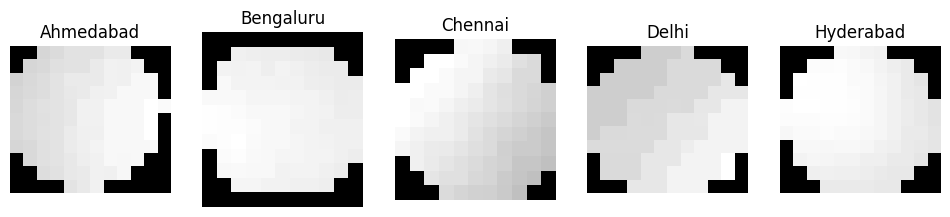

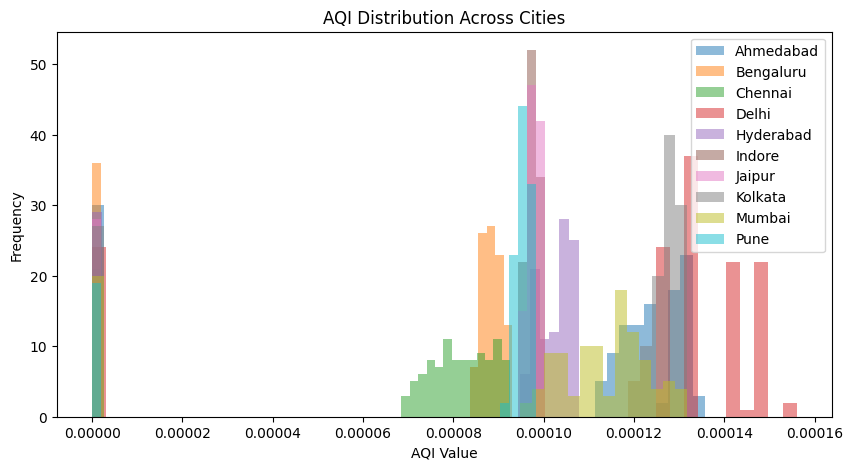

In [38]:
from google.colab import drive
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 2: Specify the folder where TIF files are stored in Google Drive
tif_folder = "/content/drive/MyDrive/GEE_AQI_Images"  # Update with your folder path

# List of cities
cities = ["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad",
          "Indore", "Jaipur", "Kolkata", "Mumbai", "Pune"]

# Dictionary to store images
aqi_images = {}

# Step 3: Load and analyze all TIF files
for city in cities:
    tif_path = os.path.join(tif_folder, f"{city}_AQI.tif")  # Construct full path

    if os.path.exists(tif_path):  # Check if file exists
        with rasterio.open(tif_path) as src:
            img_data = src.read(1)  # Read the first band
            img_data[np.isnan(img_data)] = 0  # Replace NaNs with 0
            aqi_images[city] = img_data  # Store in dictionary

            # Print statistics
            print(f"📍 {city} - Shape: {img_data.shape}, Min: {img_data.min()}, Max: {img_data.max()}")
    else:
        print(f"❌ File not found for {city}")

# Step 4: Visualize Sample TIF Images
def visualize_images(image_dict, cities_to_show=5):
    sample_cities = list(image_dict.keys())[:cities_to_show]
    plt.figure(figsize=(12, 6))

    for i, city in enumerate(sample_cities):
        plt.subplot(1, cities_to_show, i+1)
        plt.imshow(image_dict[city], cmap="gray")
        plt.title(city)
        plt.axis("off")

    plt.show()

# Show images for first 5 cities
visualize_images(aqi_images, cities_to_show=5)

# Step 5: Plot Histogram for AQI Distribution
plt.figure(figsize=(10, 5))
for city, img_data in aqi_images.items():
    plt.hist(img_data.ravel(), bins=50, alpha=0.5, label=city)

plt.title("AQI Distribution Across Cities")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()
